# 컴퓨터 네트워크

* 분산되어 있는 컴퓨터를 통신망으로 연결한 것을 컴퓨터 네트워크라고 합니다.
* 보통 유선케이블로 연결되거나 무선매체를 통해 연결 할 수 있습니다.

# 네트워크 소켓
* 컴퓨터 네트워크를 경유하는 프로세스 간 통신의 종착점을 말합니다.
* 소켓은 파일입출력을 네트워크로 확장시킨 추상적인 개념입니다.
* 네트워크 통신을 하는 모든 프로그램들은 소켓을 생성하고 생성된 소켓을 통해서 데이터를 주고 받습니다.
* 소켓의 정의는 <a href="https://tools.ietf.org/html/rfc147">RFC147</a> 문서에 정의 되어있습니다.
* 일반적인 컴퓨터의 소켓 통신은 TCP/IP, UDP/IP 프로토콜을 사용합니다.

In [ ]:
# 파이썬에서 소켓 생성 및 접속
import socket

# socket(인터넷주소체계, 소켓타입) 생성
# AF_INET(Address Family InterNet) : 인터넷 IPv4 주소체계
# SOCK_STREAM: TCP 통신, SOCK_DGRAM: UDP 통신
c_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# 생성된 소켓으로 접속시도
c_socket.connect(('www.naver.com', 80))

# 프로토콜

* 프로토콜이라는 용어는 원거리의 컴퓨터 혹은 통신장비 사이에 메세지를 주고 받는 양식 혹은 규칙을 말합니다.
* 그냥 쉽게 컴퓨터(통신기기) 끼리 무언가를 주고 받기 위한 약속이라고 볼 수 있습니다.

    **프로토콜 종류 예시**
    
    * HTTP (Hyper Text Transfer Protocol), 80번 포트 사용, WWW 웹에서 정보를 주고 받을 수 있는 프로토콜
    * HTTPS (Secure Hyper Text Transfer Protocol), 443번 포트 사용, HTTP 에 보안이 강화된 버전
    * FTP (File Transfer Protocol), 21번 포트 사용, 서버와 클라이언트 사이에 파일을 전송하기 위한 프로토콜
    * SMTP (Simple Mail Transfer Protocol) 25번 포트 사용, 인터넷에서 이메일을 보내기 위한 프로토콜 

# HTTP 프로토콜

* HTTP (HyperText Transfer Protocol) WWW 상에서 정보를 주고 받을 수 있는 프로토콜이며 주로 HTML 문서를 주고 받습니다.
* HTTP 는 비연결지향성 입니다. 비연결 지향성이란 말은 웹서버(서버)와 브라우저(클라이언트)가 계속 연결된 상태가 아니라 브라우저(클라이언트)가 페이지를 한번 요청하면 웹서버는 요청에 대한 HTML 문서를 문자열로 리턴하고 접속이 종료됩니다.
* 웹서버는 이런 비연결지향적인 성질 때문에 클라언트의 이전 상태를 알수 없습니다. 그래서 이런 부분을 보완하기 위해 세션, 쿠키등을 부가적으로 사용하게 됩니다.
* 현재 대부분 사용중인 HTTP/1.1 은 <a href="https://tools.ietf.org/html/rfc2616">RFC 2616</a>을 기반으로 되어있으며 HTTP/2까지 개발된 상태입니다.

### HTTP 프로토콜 작동 방식


![HTTP이미지](images/HTTP.jpg)


* 클라이언트: 서버에 Request(요청) 하는 클라이언트 소프트웨어(웹브라우저) 가 설치된 컴퓨터
* 서버: 클라이언트(웹브라우저)의 Request(요청)을 받아서 결과를 응답(Response) 하는 소프트웨어(아파치, NginX, IIS 등)가 설치된 컴퓨터

## Request (요청)

* 클라이언트(브라우저)가 서버에 필요한 데이터를 요청하는 단계 입니다.
* 실제 클라이언트 소프트웨어의 내부 소켓에서는 아래와 같은 프로토콜에 대한 약속대로 데이터를 요청합니다.
* 요청 내용과 헤더 필드는 새로운줄(캐리지리턴)로 구분되어야 하며 마지막은 빈줄로 끝나야 합니다.
> GET / HTTP/1.1(엔터)  
> Host: www.google.com(엔터)    
> (엔터)  


## Response (응답)

* 서버가 클라이언트의 요청에 대한 결과를 돌려주는 단계 입니다.

## Session (세션)

* 서버측에 저장되는 정보 입니다.
* HTTP 의 비연결지향성으로 인해 서버측에서는 클라이언트를 식별하지 못하기 때문에 이 단점을 극복하기 위해 나온 개념입니다.
* 서버측에서는 클라이언트를 식별하기 위해 세션 아이디라는 임의의 의미없는 숫자 및 문자열 조합의 값을 만들어 클라이언트에 부여하게 되고 클라이언트 측에는 이 값이 쿠키로 저장됩니다. 그 후 서버에 설정된 시간안에 클라이언트가 다시 접속하면 이 세션아이디를 확인하여 기존에 접속된 사용자인지 아닌지를 판단할 수 있게 됩니다. 참고로 이 개념은 서비스 로그인 개념과는 다른 이야기이지만 실제 서버에서 로그인을 구현할때 세션 개념을 사용 합니다.

## Cookie (쿠키)

* 클라이언트 측에 저장되는 정보 입니다.
* 서버에 의해 클라인트에 저장되는 정보파일을 일컫는 용어 입니다.
* 쿠키는 무한으로 생성될 수 없고 브라우저별 쿠키 생성 제한 및 도메인당 생성제한이 있고 한개의 쿠키는 제한용량을 가집니다.
* 쿠키의 값은 서버의 요청에 의해 자동으로 Request 헤더에 붙어서 전송됩니다.

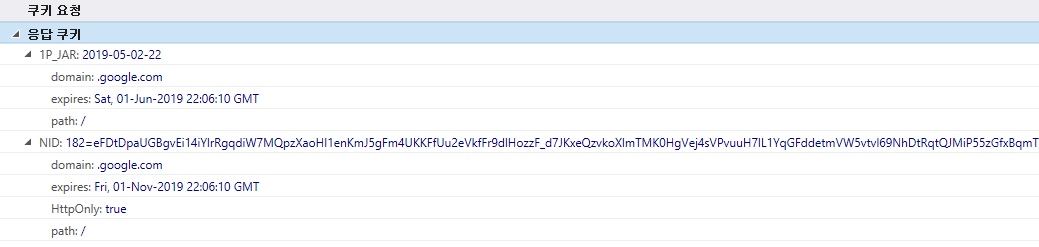

* 브라우저의 개발자도구를 사용하면 페이지 로드시 어떤 쿠키값이 읽혀지고 쓰여지는지 확인 할 수 있습니다.

## HTTP Session Hijacking (세션 하이재킹)

* 세션하이재킹이란 웹사이트 방문시 로그인 인증에 사용되는 쿠키를 탈취하여 다른 사용자로 서버를 속이는 해킹 기술입니다.
* 웹서버의 인증 방식은 취약한 부분이 많기 때문에 쿠키에 중요한 정보를 저장하면 절대 안됩니다.
* 네이버 로그인은 NID_AUT, NID_SES 쿠키값으로 로그인 유저를 판단합니다.

In [ ]:
# 직접 소켓을 써서 HTTP 프로토콜로 구글에 Request 해보기
import socket

# AF_INET 주소체계으 TCP 소켓 생성
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# google.com 도메인네임을 IP로 변환하기 위해 gethostbyname() 호출
google_ip = socket.gethostbyname("google.com")

# google 아이피에 80 번 포트로 접속
sock.connect((google_ip, 80))

# GET [웹페이지] HTTP/1.1(엔터) 전송
# 소켓은 바이트 형태의 데이터만 전송하기 때문에 str 을 encode() 하여 byte 형태로 만듬
sock.send("GET / HTTP/1.1\n".encode())
# host 헤더값을 붙임
sock.send("host: www.google.com\n".encode())
# user-agent 헤더값 추가
sock.send("user-agent: Mozilla/5.0\n".encode())
# 더이상 내용이 없으므로 빈줄 삽입
sock.send("\n".encode())

# 4096바이트만큼 데이터 수신
buffer = sock.recv(4096)

# 수신된 byte형태를 str로 형변환 후 캐리지리턴(\r\n) 값을 파이썬 엔터값(\n) 으로 치환
recv = buffer.decode().replace("\r\n", "\n")

# 소켓 닫기
sock.close()

# 출력
for p in recv.split("\n"):
    print(p)

### 코드의 문제점
* buffer = sock.recv(4096) 여기서 4096바이트 이상의 데이터가 전송될경우 받지 못합니다.

In [5]:
# 직접 소켓을 써서 HTTP 프로토콜로 구글에 Request 해보기
import socket

# AF_INET 주소체계으 TCP 소켓 생성
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# google.com 도메인네임을 IP로 변환하기 위해 gethostbyname() 호출
google_ip = socket.gethostbyname("google.com")

# google 아이피에 80 번 포트로 접속
sock.connect((google_ip, 80))

# 소켓에 타임아웃 속성을 줘서 2초간 응답이 없으면 timeout 오류를 발생시킨다.
sock.settimeout(1.2)

# GET [웹페이지] HTTP/1.1(엔터) 전송
# 소켓은 바이트 형태의 데이터만 전송하기 때문에 str 을 encode() 하여 byte 형태로 만듬
sock.send("GET / HTTP/1.1\n".encode())
# host 헤더값을 붙임
sock.send("host: www.google.com\n".encode())
# user-agent 헤더값 추가
sock.send("user-agent: Mozilla/5.0\n".encode())
# 더이상 내용이 없으므로 빈줄 삽입
sock.send("\n".encode())

# 서버에서 보낸 데이터를 기록해놓기 위한 bytes 형태의 변수
receive_datas = bytes()

# 서버에서 데이터를 다 받을때까지 무한루프
while True:
    try:
        # 서버에서 데이터를 받음
        buffer = sock.recv(1024)
        
        # 받은 데이터양 표시
        print(len(buffer))
        
        # buffers 에 데이터를 누적시킴
        receive_datas += buffer
    except Exception as e:
        print(e)
        break

# 수신된 byte형태를 str로 형변환 후 캐리지리턴(\r\n) 값을 파이썬 엔터값(\n) 으로 치환
recv = receive_datas.decode().replace("\r\n", "\n")

# 소켓 닫기
sock.close()

# 출력
for p in recv.split("\n"):
    print(p)

1024
1024
812
1024
1024
812
1024
1024
812
1024
1024
812
1024
1024
812
1024
1024
812
1024
1024
812
1024
1024
812
1024
1024
812
1024
1024
812
1024
1024
812
1024
1024
812
1024
1024
812
1024
1024
812
1024
1024
812
1024
406
1024
1024
547
timed out
HTTP/1.1 200 OK
Date: Fri, 03 May 2019 01:47:46 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Type: text/html; charset=UTF-8
P3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."
Server: gws
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Set-Cookie: 1P_JAR=2019-05-03-01; expires=Sun, 02-Jun-2019 01:47:46 GMT; path=/; domain=.google.com
Set-Cookie: NID=182=xXriqfyj_eOusIGyxpjNVNMiezeUuaLrhyIwHuuOcoTa6hrMg_bbZzAB-AA7wZ4ApPGCedvoO4mmYg1cYgdHLB_8BvA2H_3mQ8XQy5a9Nd-20W1YgVpn8aRdur-ozynh10oKjGYq7LW32_gsbOPN4vNVbf6OUtPMvgvsqRwBoCY; expires=Sat, 02-Nov-2019 01:47:46 GMT; path=/; domain=.google.com; HttpOnly
Accept-Ranges: none
Vary: Accept-Encoding
Transfer-Encoding: chunked

52dd
<!doctype html><html itemscope="" itemtype="http

### 수정된 코드
* while True 문으로 무한루프를 돌며 서버에서 모든 데이터를 받습니다.
* buffer = socket.recv(1024) 만큼 씩 데이터를 받아 receive_datas 에 저장합니다. 
* print(len(buffer))를 보면 알 수 있듯이 recv(1024)를 했다고 꼭 1024만큼 받아지는건 아니니 주의해야 합니다.
* 소켓은 기본적으로 블러킹모드로 동작하기 때문에 이를 운영체제에서 넌블러킹모드로 동작하게 하거나 아니면 응답시간을 설정해 응답시간동안 서버에서 응답이 없으면 오류를 발생하게 해서 무한루프를 빠져나오게끔 설계를 해야합니다.
    > 소켓을 넌블러킹 모드로 동작하게 하려면  
    > import fcntl, os  
    > fcntl.fcntl(sock, fcntl.F_SETFL, os.O_NONBLOCK)
* 그래서 소켓 접속 후 socket.settimeout(2) 로 소켓의 응답 대기시간을 2초로 설정합니다.